# 1.) Import the data from CCLE into a new Google Colab file

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/441B/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df = pd.get_dummies(df)
df['target_col'] = df['charges']
df

# (Just notes for myself
#df.loc[df["sex"]] == "female","sex"] = 1.
#df.loc[df["sex"]] == "male","sex"] = 0
#df.loc[df["smoker"]] == "yes","smoker"] = 1
#df.loc[df["smoker"]] == "yes","smoker"] = 0
#df.loc[df["sex"]] == "region","sex"] = 0 # LabelEncoder)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,target_col
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1,16884.92400
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0,1725.55230
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0,4449.46200
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0,21984.47061
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0,10600.54830
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0,2205.98080
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0,1629.83350
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1,2007.94500


In [ ]:
df = df.drop(columns= ['charges','sex_male','smoker_no'])
df

,age,bmi,children,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,target_col
0,19,27.900,0,1,1,0,0,0,1,16884.92400
1,18,33.770,1,0,0,0,0,1,0,1725.55230
2,28,33.000,3,0,0,0,0,1,0,4449.46200
3,33,22.705,0,0,0,0,1,0,0,21984.47061
4,32,28.880,0,0,0,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,0,0,1,0,0,10600.54830
1334,18,31.920,0,1,0,1,0,0,0,2205.98080
1335,18,36.850,0,1,0,0,0,1,0,1629.83350
1336,21,25.800,0,1,0,0,0,0,1,2007.94500


# 2.) Split the data into 80/20, in/out sample

In [ ]:
import numpy as np

In [ ]:
data = np.array(df.iloc[:, :-1])
target = np.array(df.iloc[:, -1])

In [ ]:
cut = int((len(data) * .8) // 1)

In [ ]:
in_data = data[:cut]
out_data = data[cut:]

in_target = target[:cut]
out_target = target[cut:]

# 3.) Normalize the Data

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.StandardScaler().fit(in_data)

In [ ]:
in_data_scale = scaler.transform(in_data)
out_data_scale = scaler.transform(out_data)

In [ ]:
# checking it normalized the data
in_data

array([[19.   , 27.9  ,  0.   , ...,  0.   ,  0.   ,  1.   ],
       [18.   , 33.77 ,  1.   , ...,  0.   ,  1.   ,  0.   ],
       [28.   , 33.   ,  3.   , ...,  0.   ,  1.   ,  0.   ],
       ...,
       [39.   , 42.655,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [63.   , 21.66 ,  1.   , ...,  1.   ,  0.   ,  0.   ],
       [54.   , 31.9  ,  1.   , ...,  0.   ,  1.   ,  0.   ]])

In [ ]:
in_data_scale

array([[-1.45390122, -0.47403991, -0.90286618, ..., -0.55791981,
        -0.6155209 ,  1.76504522],
       [-1.52464584,  0.4911621 , -0.06353793, ..., -0.55791981,
         1.6246402 , -0.56655772],
       [-0.81719959,  0.36455128,  1.61511857, ..., -0.55791981,
         1.6246402 , -0.56655772],
       ...,
       [-0.03900872,  1.95211949, -0.90286618, ..., -0.55791981,
        -0.6155209 , -0.56655772],
       [ 1.65886228, -1.50008089, -0.06353793, ...,  1.79237229,
        -0.6155209 , -0.56655772],
       [ 1.02216066,  0.18367867, -0.06353793, ..., -0.55791981,
         1.6246402 , -0.56655772]])

# 4.) Get lambda from Lasso cross validation

In [ ]:
import sklearn as sk
from sklearn.linear_model import LassoCV

modCV = LassoCV().fit(in_data_scale,in_target)

In [ ]:
# find the alpha
a = modCV.alpha_
a 

176.27926602952408

# 5.) Run a lambda regression with that Lambda

In [57]:
from sklearn.linear_model import Lasso
mod1 = Lasso(alpha = a).fit(in_data_scale, in_target)

# 6.) Visualize the coefficients 

In [58]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

column_names = list(df.columns.values)
column_names = column_names[:-1]


Text(0.5, 1.0, 'Statistical relevance of variables')

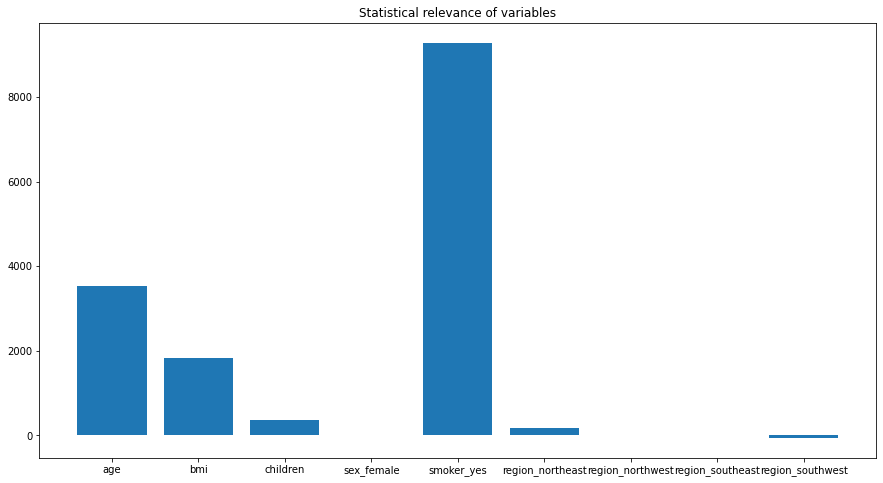

In [59]:
figure(figsize = (15,8))
plt.bar(column_names, mod1.coef_)
plt.title('Statistical relevance of variables')

# 7.) Interpret the coefficients

As mentioned in class, because of the normalization / scaling of the data, coefficients are not interpretable from the graph. We can however see that smoking is the variable that has the highest impact on insurance premium, followed by age and bmi. 

# 8.) Compare in and out of sample MSE’s

In [ ]:
# mod1.predict("in_sample data")
# mod1.predict("out_sample data")

In [60]:
mod1 = Lasso(alpha = a).fit(in_data_scale, in_target)

In [61]:
from sklearn.metrics import mean_squared_error

test_predicted = mod1.predict(out_data_scale)
train_predicted = mod1.predict(in_data_scale)

rms_outsample = np.sqrt(mean_squared_error(out_target, test_predicted, squared=False ))
rms_insample = np.sqrt(mean_squared_error(in_target, train_predicted, squared=False ))

In [62]:
print('RMSE testing set:',rms_outsample)
print('RMSE training set:', rms_insample)


RMSE testing set: 78.1523355178814
RMSE training set: 77.78207010626102


The two RMSEs are not close to 0 and very close to each other, which shows that the model is performing well and not overfitting. The RMSE of the out of sample set is slightly higher than for the training sample, which makes sense (testing the model on new data)